#**DinkyMishra**
#**CIS 660 | Data Mining**
#**2864923**
#**Lab3-Machine Learning**

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# **1.Data Preparation**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime,date
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
pd.set_option('display.max_columns', None)
plt.rcParams["figure.figsize"] = (12,5)

import warnings
warnings.filterwarnings('ignore')

In [3]:
ls

drive/  merged_data_encoded.csv  sample_data/


In [4]:
merged_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vTargetMailCustomer.csv', encoding='latin1')

In [5]:
merged_data.head()

,CustomerKey,GeographyKey,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,Suffix,Gender,EmailAddress,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,SpanishEducation,FrenchEducation,EnglishOccupation,SpanishOccupation,FrenchOccupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CommuteDistance,Region,Age,BikeBuyer
0,11000,26,AW00011000,NaN,Jon,V,Yang,0,4/8/1966,M,NaN,M,jon24@adventure-works.com,90000,2,0,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,1,0,3761 N. 14th St,NaN,1 (11) 500 555-0162,7/22/2005,1-2 Miles,Pacific,49,1
1,11001,37,AW00011001,NaN,Eugene,L,Huang,0,5/14/1965,S,NaN,M,eugene10@adventure-works.com,60000,3,3,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,0,1,2243 W St.,NaN,1 (11) 500 555-0110,7/18/2005,0-1 Miles,Pacific,50,1
2,11002,31,AW00011002,NaN,Ruben,NaN,Torres,0,8/12/1965,M,NaN,M,ruben35@adventure-works.com,60000,3,3,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,1,1,5844 Linden Land,NaN,1 (11) 500 555-0184,7/10/2005,2-5 Miles,Pacific,50,1
3,11003,11,AW00011003,NaN,Christy,NaN,Zhu,0,2/15/1968,S,NaN,F,christy12@adventure-works.com,70000,0,0,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,0,1,1825 Village Pl.,NaN,1 (11) 500 555-0162,7/1/2005,5-10 Miles,Pacific,47,1
4,11004,19,AW00011004,NaN,Elizabeth,NaN,Johnson,0,8/8/1968,S,NaN,F,elizabeth5@adventure-works.com,80000,5,5,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,1,4,7553 Harness Circle,NaN,1 (11) 500 555-0131,7/26/2005,1-2 Miles,Pacific,47,1


# **2.Data Cleaning**

In [6]:
# To print the shape explicitly
print(merged_data.shape)

(18484, 32)


In [7]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerKey           18484 non-null  int64 
 1   GeographyKey          18484 non-null  int64 
 2   CustomerAlternateKey  18484 non-null  object
 3   Title                 101 non-null    object
 4   FirstName             18484 non-null  object
 5   MiddleName            10654 non-null  object
 6   LastName              18484 non-null  object
 7   NameStyle             18484 non-null  int64 
 8   BirthDate             18484 non-null  object
 9   MaritalStatus         18484 non-null  object
 10  Suffix                3 non-null      object
 11  Gender                18484 non-null  object
 12  EmailAddress          18484 non-null  object
 13  YearlyIncome          18484 non-null  int64 
 14  TotalChildren         18484 non-null  int64 
 15  NumberChildrenAtHome  18484 non-null

In [8]:
print(merged_data.isnull().sum())

CustomerKey                 0
GeographyKey                0
CustomerAlternateKey        0
Title                   18383
FirstName                   0
MiddleName               7830
LastName                    0
NameStyle                   0
BirthDate                   0
MaritalStatus               0
Suffix                  18481
Gender                      0
EmailAddress                0
YearlyIncome                0
TotalChildren               0
NumberChildrenAtHome        0
EnglishEducation            0
SpanishEducation            0
FrenchEducation             0
EnglishOccupation           0
SpanishOccupation           0
FrenchOccupation            0
HouseOwnerFlag              0
NumberCarsOwned             0
AddressLine1                0
AddressLine2            18172
Phone                       0
DateFirstPurchase           0
CommuteDistance             0
Region                      0
Age                         0
BikeBuyer                   0
dtype: int64


In [9]:
numerical_col = []
for col in merged_data.columns:
    if merged_data[col].dtypes != 'object':
        numerical_col.append(col)
numerical_col

['CustomerKey',
 'GeographyKey',
 'NameStyle',
 'YearlyIncome',
 'TotalChildren',
 'NumberChildrenAtHome',
 'HouseOwnerFlag',
 'NumberCarsOwned',
 'Age',
 'BikeBuyer']

In [10]:
merged_data[numerical_col].head()

,CustomerKey,GeographyKey,NameStyle,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,Age,BikeBuyer
0,11000,26,0,90000,2,0,1,0,49,1
1,11001,37,0,60000,3,3,0,1,50,1
2,11002,31,0,60000,3,3,1,1,50,1
3,11003,11,0,70000,0,0,0,1,47,1
4,11004,19,0,80000,5,5,1,4,47,1


In [11]:
merged_data.drop(['CustomerKey','NameStyle'], axis=1, inplace=True)

In [12]:
merged_data.columns

Index(['GeographyKey', 'CustomerAlternateKey', 'Title', 'FirstName',
       'MiddleName', 'LastName', 'BirthDate', 'MaritalStatus', 'Suffix',
       'Gender', 'EmailAddress', 'YearlyIncome', 'TotalChildren',
       'NumberChildrenAtHome', 'EnglishEducation', 'SpanishEducation',
       'FrenchEducation', 'EnglishOccupation', 'SpanishOccupation',
       'FrenchOccupation', 'HouseOwnerFlag', 'NumberCarsOwned', 'AddressLine1',
       'AddressLine2', 'Phone', 'DateFirstPurchase', 'CommuteDistance',
       'Region', 'Age', 'BikeBuyer'],
      dtype='object')

In [13]:
merged_data.describe().T

,count,mean,std,min,25%,50%,75%,max
GeographyKey,18484.0,257.956287,196.531062,2.0,62.0,240.0,345.0,654.0
YearlyIncome,18484.0,57305.777970,32285.841703,10000.0,30000.0,60000.0,70000.0,170000.0
TotalChildren,18484.0,1.844352,1.612408,0.0,0.0,2.0,3.0,5.0
NumberChildrenAtHome,18484.0,1.004058,1.522660,0.0,0.0,0.0,2.0,5.0
HouseOwnerFlag,18484.0,0.676369,0.467874,0.0,0.0,1.0,1.0,1.0
NumberCarsOwned,18484.0,1.502705,1.138394,0.0,1.0,2.0,2.0,4.0
Age,18484.0,53.135793,11.261340,34.0,44.0,52.0,61.0,105.0
BikeBuyer,18484.0,0.494049,0.499978,0.0,0.0,0.0,1.0,1.0


In [14]:
categorical_col = []
for col in merged_data.columns:
    if col not in numerical_col:
        categorical_col.append(col)
categorical_col

['CustomerAlternateKey',
 'Title',
 'FirstName',
 'MiddleName',
 'LastName',
 'BirthDate',
 'MaritalStatus',
 'Suffix',
 'Gender',
 'EmailAddress',
 'EnglishEducation',
 'SpanishEducation',
 'FrenchEducation',
 'EnglishOccupation',
 'SpanishOccupation',
 'FrenchOccupation',
 'AddressLine1',
 'AddressLine2',
 'Phone',
 'DateFirstPurchase',
 'CommuteDistance',
 'Region']

In [15]:
merged_data[categorical_col].head()

,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,BirthDate,MaritalStatus,Suffix,Gender,EmailAddress,EnglishEducation,SpanishEducation,FrenchEducation,EnglishOccupation,SpanishOccupation,FrenchOccupation,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CommuteDistance,Region
0,AW00011000,NaN,Jon,V,Yang,4/8/1966,M,NaN,M,jon24@adventure-works.com,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,3761 N. 14th St,NaN,1 (11) 500 555-0162,7/22/2005,1-2 Miles,Pacific
1,AW00011001,NaN,Eugene,L,Huang,5/14/1965,S,NaN,M,eugene10@adventure-works.com,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,2243 W St.,NaN,1 (11) 500 555-0110,7/18/2005,0-1 Miles,Pacific
2,AW00011002,NaN,Ruben,NaN,Torres,8/12/1965,M,NaN,M,ruben35@adventure-works.com,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,5844 Linden Land,NaN,1 (11) 500 555-0184,7/10/2005,2-5 Miles,Pacific
3,AW00011003,NaN,Christy,NaN,Zhu,2/15/1968,S,NaN,F,christy12@adventure-works.com,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,1825 Village Pl.,NaN,1 (11) 500 555-0162,7/1/2005,5-10 Miles,Pacific
4,AW00011004,NaN,Elizabeth,NaN,Johnson,8/8/1968,S,NaN,F,elizabeth5@adventure-works.com,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,7553 Harness Circle,NaN,1 (11) 500 555-0131,7/26/2005,1-2 Miles,Pacific


In [16]:
merged_data.isnull().sum()

,0
GeographyKey,0
CustomerAlternateKey,0
Title,18383
FirstName,0
MiddleName,7830
LastName,0
BirthDate,0
MaritalStatus,0
Suffix,18481
Gender,0


In [17]:
merged_data.drop(['CustomerAlternateKey', 'Title', 'FirstName', 'MiddleName', 'LastName', 'BirthDate',
         'Suffix', 'EmailAddress', 'AddressLine1', 'AddressLine2', 'Phone'], axis=1, inplace=True)

In [18]:
merged_data.drop(['DateFirstPurchase'], axis=1, inplace=True)

In [19]:
for col in merged_data.columns:
    if merged_data[col].dtypes == 'object':
        print(f'{col} : {merged_data[col].unique()}')

MaritalStatus : ['M' 'S']
Gender : ['M' 'F']
EnglishEducation : ['Bachelors' 'Partial College' 'High School' 'Partial High School'
 'Graduate Degree']
SpanishEducation : ['Licenciatura' 'Estudios universitarios (en curso)'
 'Educaci¢n secundaria' 'Educaci¢n secundaria (en curso)'
 'Estudios de postgrado']
FrenchEducation : ['Bac + 4' 'Baccalaur\x82at' 'Bac + 2' 'Niveau bac' 'Bac + 3']
EnglishOccupation : ['Professional' 'Management' 'Skilled Manual' 'Clerical' 'Manual']
SpanishOccupation : ['Profesional' 'Gesti¢n' 'Obrero especializado' 'Administrativo' 'Obrero']
FrenchOccupation : ['Cadre' 'Direction' 'Technicien' 'Employ\x82' 'Ouvrier']
CommuteDistance : ['1-2 Miles' '0-1 Miles' '2-5 Miles' '5-10 Miles' '10+ Miles']
Region : ['Pacific' 'North America' 'Europe']


In [20]:
merged_data.head()

,GeographyKey,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,SpanishEducation,FrenchEducation,EnglishOccupation,SpanishOccupation,FrenchOccupation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Region,Age,BikeBuyer
0,26,M,M,90000,2,0,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,1,0,1-2 Miles,Pacific,49,1
1,37,S,M,60000,3,3,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,0,1,0-1 Miles,Pacific,50,1
2,31,M,M,60000,3,3,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,1,1,2-5 Miles,Pacific,50,1
3,11,S,F,70000,0,0,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,0,1,5-10 Miles,Pacific,47,1
4,19,S,F,80000,5,5,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,1,4,1-2 Miles,Pacific,47,1


**3.One hot-encoding**

In [21]:
categorical_columns = ['MaritalStatus', 'Gender', 'EnglishEducation', 'SpanishEducation',
                       'FrenchEducation', 'EnglishOccupation', 'SpanishOccupation',
                       'FrenchOccupation', 'HouseOwnerFlag', 'CommuteDistance', 'Region']

merged_data_encoded = pd.get_dummies(merged_data, columns=categorical_columns)

# Now normalize the numerical columns using StandardScaler
numerical_columns = ['YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome',
                     'NumberCarsOwned', 'Age','GeographyKey']

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the numerical columns and transform them
merged_data_encoded[numerical_columns] = scaler.fit_transform(merged_data_encoded[numerical_columns])

# Check the transformed data
print(merged_data_encoded.head())

   GeographyKey  YearlyIncome  TotalChildren  NumberChildrenAtHome  \
0     -1.180284      1.012676       0.096534             -0.659428   
1     -1.124312      0.083451       0.716741              1.310862   
2     -1.154843      0.083451       0.716741              1.310862   
3     -1.256610      0.393193      -1.143880             -0.659428   
4     -1.215903      0.702935       1.957156              2.624389   

   NumberCarsOwned       Age  BikeBuyer  MaritalStatus_M  MaritalStatus_S  \
0        -1.320058 -0.367266          1             True            False   
1        -0.441603 -0.278464          1            False             True   
2        -0.441603 -0.278464          1             True            False   
3        -0.441603 -0.544869          1            False             True   
4         2.193760 -0.544869          1            False             True   

   Gender_F  Gender_M  EnglishEducation_Bachelors  \
0     False      True                        True   
1     Fals

In [22]:
merged_data_encoded.head()

,GeographyKey,YearlyIncome,TotalChildren,NumberChildrenAtHome,NumberCarsOwned,Age,BikeBuyer,MaritalStatus_M,MaritalStatus_S,Gender_F,Gender_M,EnglishEducation_Bachelors,EnglishEducation_Graduate Degree,EnglishEducation_High School,EnglishEducation_Partial College,EnglishEducation_Partial High School,SpanishEducation_Educaci¢n secundaria,SpanishEducation_Educaci¢n secundaria (en curso),SpanishEducation_Estudios de postgrado,SpanishEducation_Estudios universitarios (en curso),SpanishEducation_Licenciatura,FrenchEducation_Bac + 2,FrenchEducation_Bac + 3,FrenchEducation_Bac + 4,FrenchEducation_Baccalaurat,FrenchEducation_Niveau bac,EnglishOccupation_Clerical,EnglishOccupation_Management,EnglishOccupation_Manual,EnglishOccupation_Professional,EnglishOccupation_Skilled Manual,SpanishOccupation_Administrativo,SpanishOccupation_Gesti¢n,SpanishOccupation_Obrero,SpanishOccupation_Obrero especializado,SpanishOccupation_Profesional,FrenchOccupation_Cadre,FrenchOccupation_Direction,FrenchOccupation_Employ,FrenchOccupation_Ouvrier,FrenchOccupation_Technicien,HouseOwnerFlag_0,HouseOwnerFlag_1,CommuteDistance_0-1 Miles,CommuteDistance_1-2 Miles,CommuteDistance_10+ Miles,CommuteDistance_2-5 Miles,CommuteDistance_5-10 Miles,Region_Europe,Region_North America,Region_Pacific
0,-1.180284,1.012676,0.096534,-0.659428,-1.320058,-0.367266,1,True,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,True,False,False,False,False,False,True
1,-1.124312,0.083451,0.716741,1.310862,-0.441603,-0.278464,1,False,True,False,True,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,True,False,True,False,False,False,False,False,False,True
2,-1.154843,0.083451,0.716741,1.310862,-0.441603,-0.278464,1,True,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True
3,-1.256610,0.393193,-1.143880,-0.659428,-0.441603,-0.544869,1,False,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True
4,-1.215903,0.702935,1.957156,2.624389,2.193760,-0.544869,1,False,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,True,False,False,False,False,False,True


In [23]:
merged_data_encoded.to_csv('merged_data_encoded.csv', index=False)

# **3.EDA:**

In [24]:
merged_data_encoded['BikeBuyer'].value_counts()

,count
BikeBuyer,
0,9352
1,9132


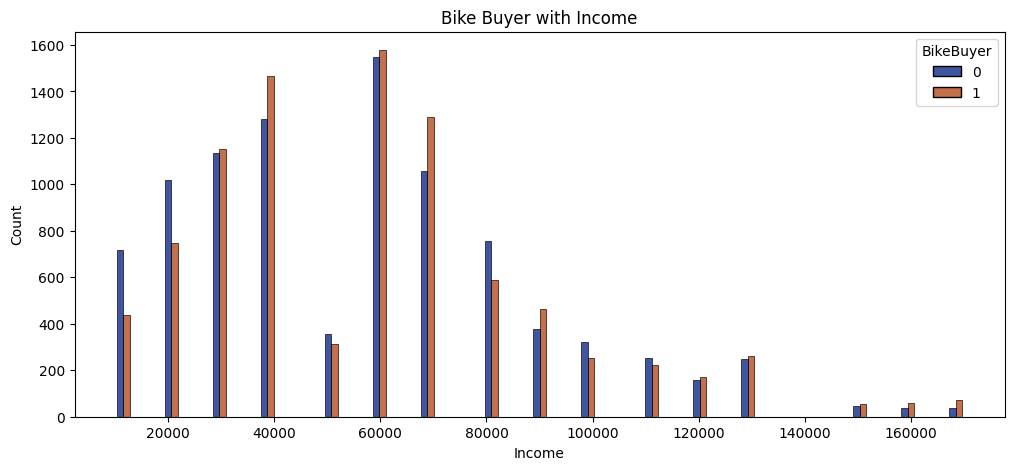

In [25]:
sns.histplot(
    x='YearlyIncome',
    hue='BikeBuyer',
    data=merged_data,
    multiple='dodge',
    shrink=.8,
    palette="dark" )

plt.title("Bike Buyer with Income")
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()


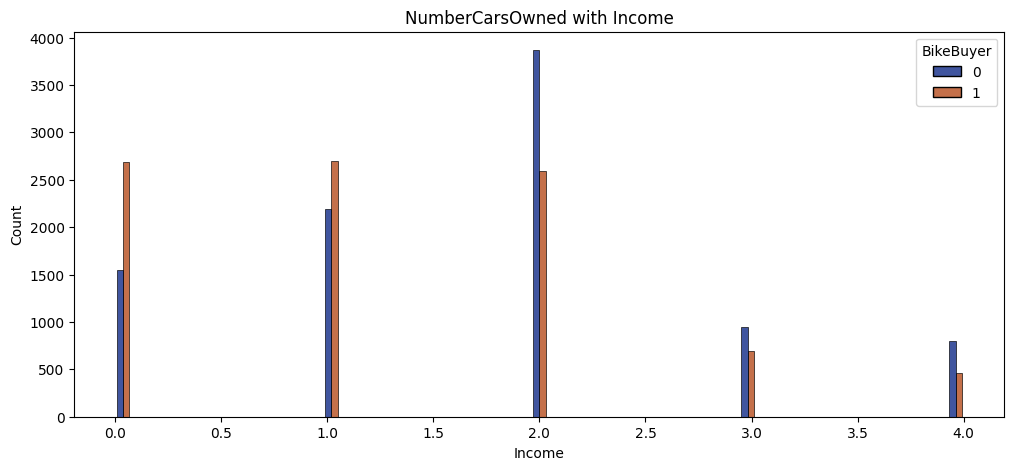

In [26]:
sns.histplot(
    x='NumberCarsOwned',
    hue='BikeBuyer',
    data=merged_data,
    multiple='dodge',
    shrink=.8,
    palette="dark" )

plt.title("NumberCarsOwned with Income")
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

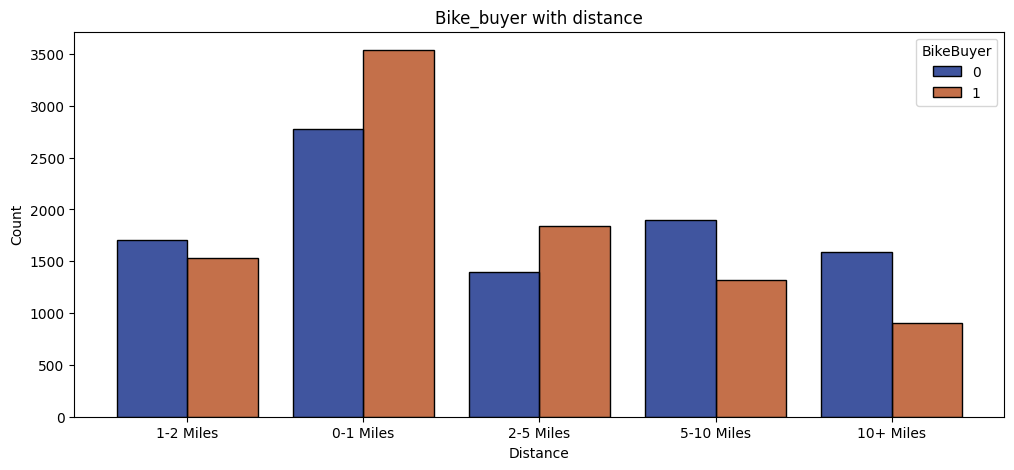

In [27]:
sns.histplot(
    x='CommuteDistance',
    hue='BikeBuyer',
    data=merged_data,
    multiple='dodge',
    shrink=.8,
    palette="dark" )

plt.title("Bike_buyer with distance")
plt.xlabel('Distance')
plt.ylabel('Count')
plt.show()

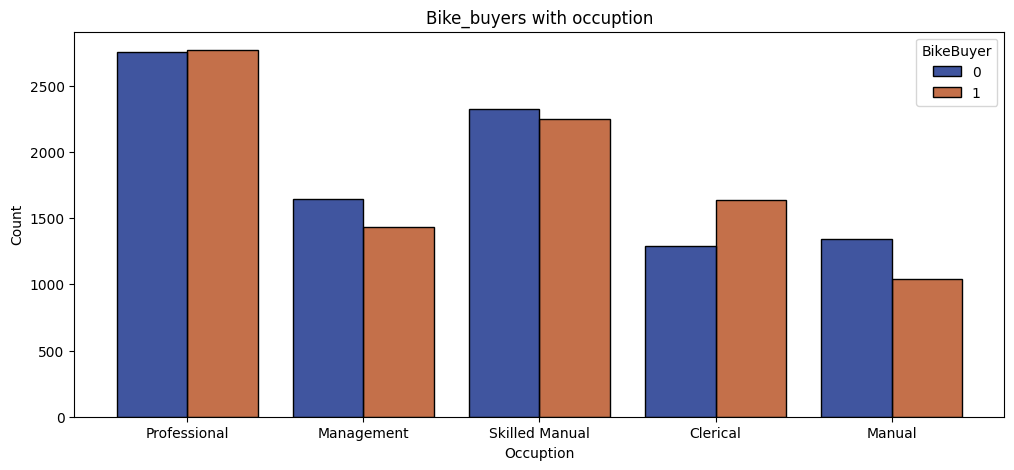

In [28]:
sns.histplot(
    x='EnglishOccupation',
    hue='BikeBuyer',
    data=merged_data,
    multiple='dodge',
    shrink=.8,
    palette="dark" )

plt.title("Bike_buyers with occuption")
plt.xlabel('Occuption')
plt.ylabel('Count')
plt.show()

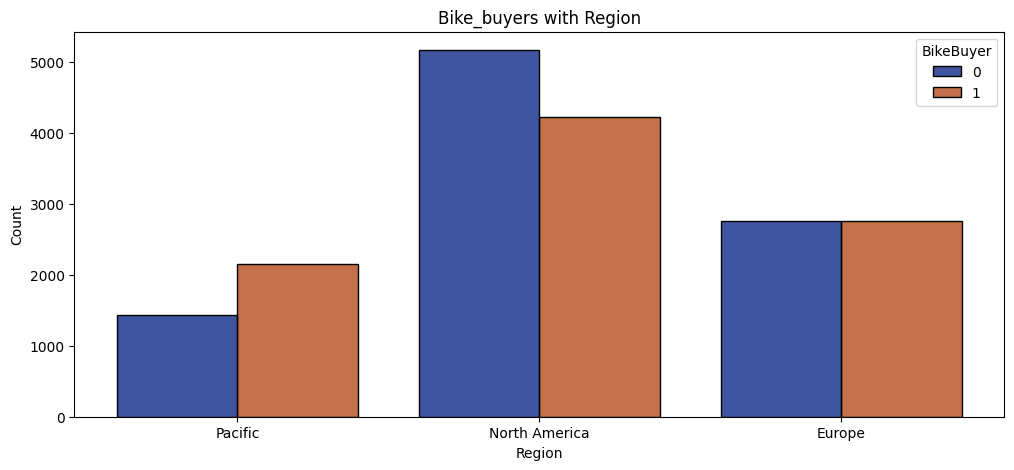

In [29]:
sns.histplot(
    x='Region',
    hue='BikeBuyer',
    data=merged_data,
    multiple='dodge',
    shrink=.8,
    palette="dark" )

plt.title("Bike_buyers with Region")
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

# **4.Data Post processing**

In [30]:
corr = merged_data_encoded.corrwith(merged_data_encoded['BikeBuyer']).sort_values(ascending=False)[:5]
corr

,0
BikeBuyer,1.000000
Region_Pacific,0.104169
CommuteDistance_0-1 Miles,0.095973
FrenchEducation_Bac + 4,0.087510
EnglishEducation_Bachelors,0.087510


In [31]:
x = merged_data_encoded.drop('BikeBuyer', axis=1)
y = merged_data_encoded['BikeBuyer']

print(x.columns)
print(f'\nData in x: {len(x)}')
print(f'\nData in y: {len(y)}')

Index(['GeographyKey', 'YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome',
       'NumberCarsOwned', 'Age', 'MaritalStatus_M', 'MaritalStatus_S',
       'Gender_F', 'Gender_M', 'EnglishEducation_Bachelors',
       'EnglishEducation_Graduate Degree', 'EnglishEducation_High School',
       'EnglishEducation_Partial College',
       'EnglishEducation_Partial High School',
       'SpanishEducation_Educaci¢n secundaria',
       'SpanishEducation_Educaci¢n secundaria (en curso)',
       'SpanishEducation_Estudios de postgrado',
       'SpanishEducation_Estudios universitarios (en curso)',
       'SpanishEducation_Licenciatura', 'FrenchEducation_Bac + 2',
       'FrenchEducation_Bac + 3', 'FrenchEducation_Bac + 4',
       'FrenchEducation_Baccalaurat', 'FrenchEducation_Niveau bac',
       'EnglishOccupation_Clerical', 'EnglishOccupation_Management',
       'EnglishOccupation_Manual', 'EnglishOccupation_Professional',
       'EnglishOccupation_Skilled Manual', 'SpanishOccupation_Administ

In [32]:
merged_data_encoded.head(5)

,GeographyKey,YearlyIncome,TotalChildren,NumberChildrenAtHome,NumberCarsOwned,Age,BikeBuyer,MaritalStatus_M,MaritalStatus_S,Gender_F,Gender_M,EnglishEducation_Bachelors,EnglishEducation_Graduate Degree,EnglishEducation_High School,EnglishEducation_Partial College,EnglishEducation_Partial High School,SpanishEducation_Educaci¢n secundaria,SpanishEducation_Educaci¢n secundaria (en curso),SpanishEducation_Estudios de postgrado,SpanishEducation_Estudios universitarios (en curso),SpanishEducation_Licenciatura,FrenchEducation_Bac + 2,FrenchEducation_Bac + 3,FrenchEducation_Bac + 4,FrenchEducation_Baccalaurat,FrenchEducation_Niveau bac,EnglishOccupation_Clerical,EnglishOccupation_Management,EnglishOccupation_Manual,EnglishOccupation_Professional,EnglishOccupation_Skilled Manual,SpanishOccupation_Administrativo,SpanishOccupation_Gesti¢n,SpanishOccupation_Obrero,SpanishOccupation_Obrero especializado,SpanishOccupation_Profesional,FrenchOccupation_Cadre,FrenchOccupation_Direction,FrenchOccupation_Employ,FrenchOccupation_Ouvrier,FrenchOccupation_Technicien,HouseOwnerFlag_0,HouseOwnerFlag_1,CommuteDistance_0-1 Miles,CommuteDistance_1-2 Miles,CommuteDistance_10+ Miles,CommuteDistance_2-5 Miles,CommuteDistance_5-10 Miles,Region_Europe,Region_North America,Region_Pacific
0,-1.180284,1.012676,0.096534,-0.659428,-1.320058,-0.367266,1,True,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,True,False,False,False,False,False,True
1,-1.124312,0.083451,0.716741,1.310862,-0.441603,-0.278464,1,False,True,False,True,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,True,False,True,False,False,False,False,False,False,True
2,-1.154843,0.083451,0.716741,1.310862,-0.441603,-0.278464,1,True,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True
3,-1.256610,0.393193,-1.143880,-0.659428,-0.441603,-0.544869,1,False,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True
4,-1.215903,0.702935,1.957156,2.624389,2.193760,-0.544869,1,False,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,True,False,False,False,False,False,True


In [33]:
marital_status = {'M':0, 'S':1}
gender = {'M': 0, 'F':1}
english_edu = {'Bachelors': 0, 'Partial College': 1, 'High School': 2, 'Partial High School': 3, 'Graduate Degree': 4}
spanish_edu = {'Licenciatura': 0, 'Estudios universitarios (en curso)': 1, 'Educaci¢n secundaria': 2,  'Educaci¢n secundaria (en curso)': 3,'Estudios de postgrado':4}
french_edu = {'Bac + 4':0, 'Baccalaur\x82at':1, 'Bac + 2':2, 'Niveau bac':3, 'Bac + 3':4}
english_occu = {'Professional':0, 'Management':1, 'Skilled Manual':2, 'Clerical':3, 'Manual':4}
spanish_occu = {'Profesional':0, 'Gesti¢n':1, 'Obrero especializado':2, 'Administrativo':3, 'Obrero':4}
french_occu = {'Cadre':0, 'Direction':1, 'Technicien':2, 'Employ\x82':3, 'Ouvrier':4}
commute = {'1-2 Miles':0, '0-1 Miles':1, '2-5 Miles':2, '5-10 Miles':3, '10+ Miles':4}
region = {'Pacific':0, 'North America':1, 'Europe':2}

In [34]:
merged_data = merged_data.replace({'MaritalStatus': marital_status})
merged_data = merged_data.replace({'Gender': gender})
merged_data = merged_data.replace({'EnglishEducation': english_edu})
merged_data = merged_data.replace({'SpanishEducation': spanish_edu})
merged_data = merged_data.replace({'FrenchEducation': french_edu})
merged_data = merged_data.replace({'EnglishOccupation': english_occu})
merged_data = merged_data.replace({'SpanishOccupation': spanish_occu})
merged_data = merged_data.replace({'FrenchOccupation': french_occu})
merged_data = merged_data.replace({'CommuteDistance': commute})
merged_data = merged_data.replace({'Region': region})


In [35]:
merged_data.head()

,GeographyKey,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,SpanishEducation,FrenchEducation,EnglishOccupation,SpanishOccupation,FrenchOccupation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Region,Age,BikeBuyer
0,26,0,0,90000,2,0,0,0,0,0,0,0,1,0,0,0,49,1
1,37,1,0,60000,3,3,0,0,0,0,0,0,0,1,1,0,50,1
2,31,0,0,60000,3,3,0,0,0,0,0,0,1,1,2,0,50,1
3,11,1,1,70000,0,0,0,0,0,0,0,0,0,1,3,0,47,1
4,19,1,1,80000,5,5,0,0,0,0,0,0,1,4,0,0,47,1


In [36]:
merged_data.head()

,GeographyKey,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,SpanishEducation,FrenchEducation,EnglishOccupation,SpanishOccupation,FrenchOccupation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Region,Age,BikeBuyer
0,26,0,0,90000,2,0,0,0,0,0,0,0,1,0,0,0,49,1
1,37,1,0,60000,3,3,0,0,0,0,0,0,0,1,1,0,50,1
2,31,0,0,60000,3,3,0,0,0,0,0,0,1,1,2,0,50,1
3,11,1,1,70000,0,0,0,0,0,0,0,0,0,1,3,0,47,1
4,19,1,1,80000,5,5,0,0,0,0,0,0,1,4,0,0,47,1


# **6.Model Experimentation**

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=12)
print(f'x_train : {x_train.shape}')
print(f'x_test : {x_test.shape}')
print(f'y_train : {y_train.shape}')
print(f'y_test : {y_test.shape}')

x_train : (12938, 50)
x_test : (5546, 50)
y_train : (12938,)
y_test : (5546,)


In [41]:
# Assuming your target variable 'BikeBuyer' is binary and is part of merged_data
X = merged_data_encoded.drop('BikeBuyer', axis=1)  # Features
y = merged_data_encoded['BikeBuyer']  # Target

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
#rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
#rf.fit(X_train, y_train)

# Get feature importances
#importances = rf.feature_importances_

# Map the feature importances to the corresponding feature names
#features = X.columns
#feature_importances = sorted(zip(importances, features), reverse=True)

#print("Feature importances:")
#for importance, feature in feature_importances:
    #print(f"{feature}: {importance}")

# **6.1.Probabilistic Approach ML algorithms**
- Decision Tree : 76% accuracy
- Random Forest : 80% accuracy

In [39]:
merged_data_encoded.columns

Index(['GeographyKey', 'YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome',
       'NumberCarsOwned', 'Age', 'BikeBuyer', 'MaritalStatus_M',
       'MaritalStatus_S', 'Gender_F', 'Gender_M', 'EnglishEducation_Bachelors',
       'EnglishEducation_Graduate Degree', 'EnglishEducation_High School',
       'EnglishEducation_Partial College',
       'EnglishEducation_Partial High School',
       'SpanishEducation_Educaci¢n secundaria',
       'SpanishEducation_Educaci¢n secundaria (en curso)',
       'SpanishEducation_Estudios de postgrado',
       'SpanishEducation_Estudios universitarios (en curso)',
       'SpanishEducation_Licenciatura', 'FrenchEducation_Bac + 2',
       'FrenchEducation_Bac + 3', 'FrenchEducation_Bac + 4',
       'FrenchEducation_Baccalaurat', 'FrenchEducation_Niveau bac',
       'EnglishOccupation_Clerical', 'EnglishOccupation_Management',
       'EnglishOccupation_Manual', 'EnglishOccupation_Professional',
       'EnglishOccupation_Skilled Manual', 'SpanishOccupa

# accuracy test code


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Modified Random Forest with adjusted parameters
rf_clf = RandomForestClassifier(
    n_estimators=300,         # Increase trees for better accuracy
    max_depth=15,             # Higher depth to capture more patterns
    min_samples_split=2,      # Smaller splits to allow more splits
    max_features='sqrt',      # Use a square root of features
    class_weight='balanced',  # Balance class weights if there's imbalance
    random_state=42           # For reproducibility
)

# Assuming X_train and y_train are already preprocessed
scores = cross_val_score(rf_clf, X_train, y_train, cv=10, scoring='accuracy')
print(f"Optimized Random Forest Accuracy: {scores.mean():.2f}")


NameError: name 'X_train' is not defined

# trainingsets

In [44]:
X = merged_data.drop('BikeBuyer', axis=1)  # Features
y = merged_data_encoded['BikeBuyer']  # Target

# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision Tree Classifier
C5 for GainRatioSplit, CART for GiniSplit on the same set of data with different parameter settings as follow:

*   Measure: Entropy, GINI
*   Different Minimum Support Thresholds
*   Different Complex Penalty Degrees on the Number of Splits




In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming merged_data and merged_data_encoded are defined
X = merged_data.drop('BikeBuyer', axis=1)
y = merged_data_encoded['BikeBuyer']

# Scale features for better performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use PCA to reduce dimensionality (optional, but may improve accuracy)
pca = PCA(n_components=10)  # Adjust components as needed
X_pca = pca.fit_transform(X_scaled)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Set up parameter grid for tuning
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize GridSearchCV with cross-validation
dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_dt_classifier = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_dt_classifier.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Optimized Accuracy of Decision Tree model: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print(f"Best Parameters: {grid_search.best_params_}")


Optimized Accuracy of Decision Tree model: 72.57%
Confusion Matrix:
[[1440  444]
 [ 570 1243]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1884
           1       0.74      0.69      0.71      1813

    accuracy                           0.73      3697
   macro avg       0.73      0.72      0.72      3697
weighted avg       0.73      0.73      0.73      3697

Best Parameters: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [46]:
X = merged_data.drop('BikeBuyer', axis=1)
y = merged_data_encoded['BikeBuyer']

# Split the data into training and testing sets (80% train, 20% test).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy of Decision Tree model: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy of Decision Tree model: 75.79%
Confusion Matrix:
[[1479  405]
 [ 490 1323]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77      1884
           1       0.77      0.73      0.75      1813

    accuracy                           0.76      3697
   macro avg       0.76      0.76      0.76      3697
weighted avg       0.76      0.76      0.76      3697



In [47]:
x_train.shape

(12938, 50)

In [48]:
y_train.shape

(14787,)

In [49]:
from sklearn.model_selection import train_test_split

# Suppose 'X' is your dataframe containing the features and 'y' is a series containing your target variable.
X = merged_data.drop('BikeBuyer', axis=1)
y = merged_data_encoded['BikeBuyer']

# Now you split the data into training and test sets.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure that the dimensions match
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (14787, 17)
y_train shape: (14787,)
x_test shape: (3697, 17)
y_test shape: (3697,)


In [50]:
classifier = DecisionTreeClassifier()
param_grid = {
        "criterion": ['gini', 'entropy'],
        "splitter": ['best', 'random'],
        "min_samples_split" :[5,10,20],
        "min_samples_leaf" : [5,10]
}

# Create GridSearchCV
grid_search = GridSearchCV(classifier, param_grid, cv=10, scoring='accuracy')

# Fit GridSearchCV to training data
grid_search.fit(x_train, y_train)  # Replace X_train and y_train with training data

# Access the best model (classifier) found by GridSearchCV
best_classifier = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_classifier.predict(x_test)  # Replace X_test with test data

# Calculate accuracy on the test data
test_accuracy = accuracy_score(y_test, y_pred)  # Replace y_test with test labels

# Generate a classification report on the test data
report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(len(best_classifier.classes_))])

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Test Accuracy:", test_accuracy)
print("\nClassification Report:\n")
print(report)
print("\nConfusion Matrix:\n")
print(conf_matrix)

Test Accuracy: 0.7736002163916689

Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.81      0.78      1884
           1       0.79      0.74      0.76      1813

    accuracy                           0.77      3697
   macro avg       0.77      0.77      0.77      3697
weighted avg       0.77      0.77      0.77      3697


Confusion Matrix:

[[1525  359]
 [ 478 1335]]


## Random Forest Classifier


In [51]:
# Train the Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Predict on the test data
rf_predictions = rf_classifier.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Accuracy: {rf_accuracy}')

# Generate and display the confusion matrix
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)
print(f'Confusion Matrix:\n{rf_confusion_matrix}')

# Calculate and display the performance metrics
rf_classification_report = classification_report(y_test, rf_predictions)
print(f'Classification Report:\n{rf_classification_report}')


Random Forest Accuracy: 0.8020016229375169
Confusion Matrix:
[[1553  331]
 [ 401 1412]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81      1884
           1       0.81      0.78      0.79      1813

    accuracy                           0.80      3697
   macro avg       0.80      0.80      0.80      3697
weighted avg       0.80      0.80      0.80      3697



## **EXTRA CREDIT:1) Feature Significance Analysis with PCA tools **
Feature selection is a crucial step in model building as it can improve model performance by including only the most relevant features. There are various methods for feature selection, and one of them is using Principal Component Analysis (PCA) for dimensionality reduction, which can also serve as a feature selection technique

In [52]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA(n_components=X_train.shape[1])
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [53]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Select the number of principal components based on explained variance ratio
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Determine the appropriate number of components by analyzing the explained variance ratio
explained_variance = pca.explained_variance_ratio_
n_components = len(explained_variance[explained_variance > 0.1])

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train Random Forest using the transformed features
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_pca, y_train)
rf_predictions = rf_classifier.predict(X_test_pca)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)
rf_classification_report = classification_report(y_test, rf_predictions)

print(f'Random Forest with PCA Accuracy: {rf_accuracy}')
print(f'Confusion Matrix:\n{rf_confusion_matrix}')
print(f'Classification Report:\n{rf_classification_report}')


Random Forest with PCA Accuracy: 0.7116581011631052
Confusion Matrix:
[[1395  489]
 [ 577 1236]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.74      0.72      1884
           1       0.72      0.68      0.70      1813

    accuracy                           0.71      3697
   macro avg       0.71      0.71      0.71      3697
weighted avg       0.71      0.71      0.71      3697



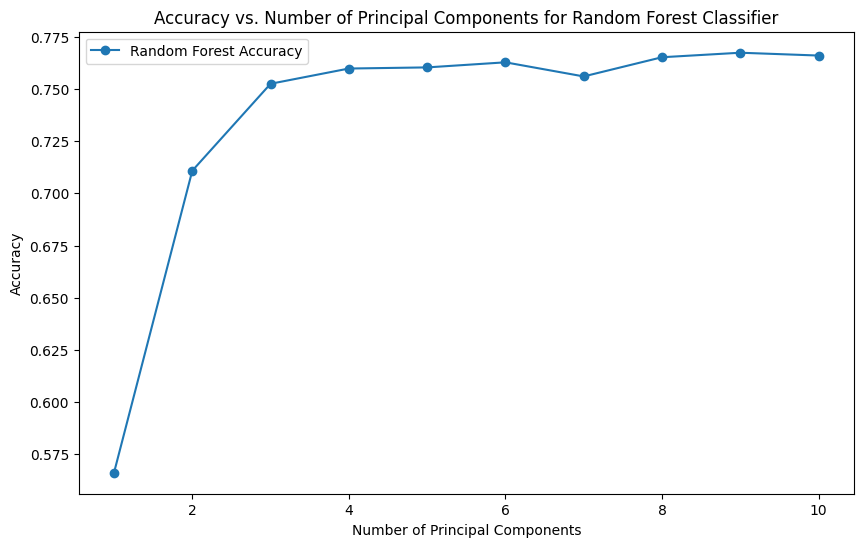

In [54]:
n_components_list = range(1, 11)
accuracy_list = []

for n_components in n_components_list:
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(X_train_pca, y_train)
    rf_predictions = rf_classifier.predict(X_test_pca)

    rf_accuracy = accuracy_score(y_test, rf_predictions)
    accuracy_list.append(rf_accuracy)

# Plot the accuracy vs. number of principal components
plt.figure(figsize=(10, 6))
plt.plot(n_components_list, accuracy_list, marker='o', label='Random Forest Accuracy')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Principal Components for Random Forest Classifier')
plt.legend()
plt.show()

This above experiment explores the impact of dimensionality reduction using Principal Component Analysis (PCA) on the performance of a Random Forest classifier for bike buyer prediction. It iteratively trains Random Forest models with varying numbers of principal components, ranging from one to ten. For each iteration, it calculates the accuracy of the model and stores it in a list. Finally, it visualizes the relationship between the number of principal components and the model's accuracy, allowing the user to identify the optimal dimensionality reduction for this task.

#**6.2.for Distance based ML Algorithms**
# Test with different K values and distance metrics
# - KNN : 75% accuracy

In [55]:
# Replace these with your actual dataset variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Dictionary to store accuracy for each n_neighbors
accuracies = {}

# Create and train the KNN classifier with different number of neighbors
for n_neighbors in [3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies[n_neighbors] = accuracy
    print(f'Accuracy with {n_neighbors} neighbors: {accuracy}')

# Find the key with the highest accuracy after the loop
best_n_neighbors = max(accuracies, key=accuracies.get)
print(f'Best accuracy is {accuracies[best_n_neighbors]} with {best_n_neighbors} neighbors')


Accuracy with 3 neighbors: 0.7465512577765756
Accuracy with 5 neighbors: 0.7433053827427644
Accuracy with 7 neighbors: 0.7322153097105761
Accuracy with 9 neighbors: 0.7273464971598593
Best accuracy is 0.7465512577765756 with 3 neighbors


Accuracy with 3 neighbors: 0.7465512577765756
Confusion Matrix for 3 neighbors:
[[1441  443]
 [ 494 1319]]


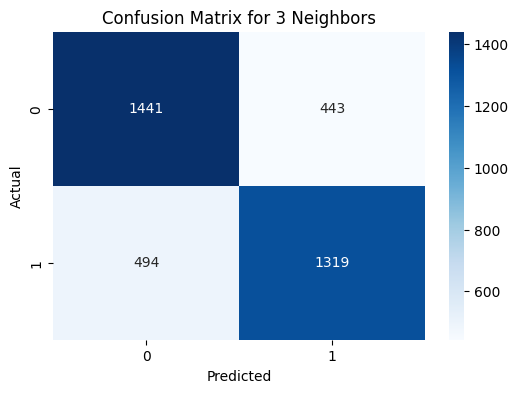

Accuracy with 5 neighbors: 0.7433053827427644
Confusion Matrix for 5 neighbors:
[[1457  427]
 [ 522 1291]]


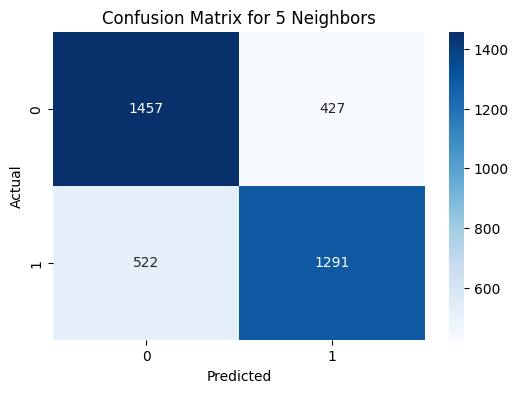

Accuracy with 7 neighbors: 0.7322153097105761
Confusion Matrix for 7 neighbors:
[[1420  464]
 [ 526 1287]]


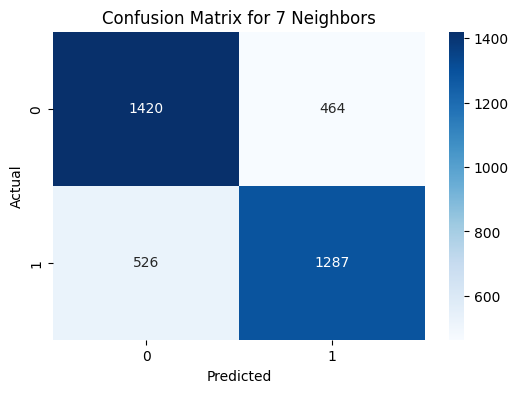

Accuracy with 9 neighbors: 0.7273464971598593
Confusion Matrix for 9 neighbors:
[[1418  466]
 [ 542 1271]]


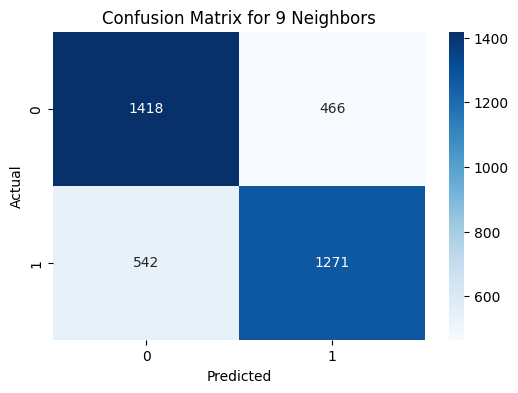

Best accuracy is 0.7465512577765756 with 3 neighbors


In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Replace these with your actual dataset variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Dictionary to store accuracy for each n_neighbors
accuracies = {}

# Create and train the KNN classifier with different number of neighbors
for n_neighbors in [3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies[n_neighbors] = accuracy
    print(f'Accuracy with {n_neighbors} neighbors: {accuracy}')

    # Create confusion matrix
    cm = confusion_matrix(y_test, predictions)
    print(f'Confusion Matrix for {n_neighbors} neighbors:\n{cm}')

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {n_neighbors} Neighbors')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Find the key with the highest accuracy after the loop
best_n_neighbors = max(accuracies, key=accuracies.get)
print(f'Best accuracy is {accuracies[best_n_neighbors]} with {best_n_neighbors} neighbors')


# **6.3.Numerical Approach ML algorithms:**
## ANN
# Test with Different Topologies: The number of hidden layers, The number units of a hidden layer
# Test with different learning rates, Batch Gradient vs Stochastic Gradient different batch size.

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam  # Import Adam optimizer

# Define the model
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))  # Adjust the input_dim as per your features
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification; use 'softmax' for multi-class

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=1)


Epoch 1/10
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5984 - loss: 0.6713
Epoch 2/10
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6539 - loss: 0.6267
Epoch 3/10
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6753 - loss: 0.6086
Epoch 4/10
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6838 - loss: 0.5985
Epoch 5/10
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6898 - loss: 0.5950
Epoch 6/10
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6885 - loss: 0.5911
Epoch 7/10
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6917 - loss: 0.5885
Epoch 8/10
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6908 - loss: 0.5863
Epoch 9/10
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6961 - loss: 0.5823
Epoch 10/10
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6940 - loss: 0.5824


In [65]:
#Example 2: Two Hidden Layers
# Define the model
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=1)


Epoch 1/10
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5855 - loss: 0.6713
Epoch 2/10
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6657 - loss: 0.6124
Epoch 3/10
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6690 - loss: 0.6068
Epoch 4/10
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6896 - loss: 0.5906
Epoch 5/10
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6880 - loss: 0.5850
Epoch 6/10
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6899 - loss: 0.5827
Epoch 7/10
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6870 - loss: 0.5788
Epoch 8/10
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6995 - loss: 0.5737
Epoch 9/10
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7002 - loss: 0.5707
Epoch 10/10
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7071 - loss: 0.5624


In [66]:
#Different Learning Rates
# Define the model
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with different learning rates
learning_rates = [0.001, 0.01, 0.1]
for lr in learning_rates:
    optimizer = Adam(learning_rate=lr)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    print(f'Training with learning rate: {lr}')
    model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=1)


Training with learning rate: 0.001
Epoch 1/10
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5531 - loss: 0.6799
Epoch 2/10
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6402 - loss: 0.6282
Epoch 3/10
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6671 - loss: 0.6101
Epoch 4/10
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6798 - loss: 0.5977
Epoch 5/10
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6791 - loss: 0.5955
Epoch 6/10
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6967 - loss: 0.5781
Epoch 7/10
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6980 - loss: 0.5797
Epoch 8/10
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7031 - loss: 0.5731
Epoch 9/10
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7081 - loss: 0.5660
Epoch 10/10
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7073 - loss: 0.5634
Training with learning rate: 0.01
Epoch 1/10
1479/1479 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/s

The analysis of the results reveals several key differences and interesting observations regarding the performance of the models with varying topologies and learning rates. When comparing the models with different numbers of hidden layers, it was observed that the model with two hidden layers achieved a higher final accuracy of 0.7071, compared to 0.6940 for the model with a single hidden layer. This suggests that the additional hidden layer helped the model capture more complex patterns in the data, leading to better performance.

In terms of learning rates, the model trained with a learning rate of 0.01 demonstrated the best performance, achieving a final accuracy of 0.7235. This learning rate provided a good balance between learning speed and stability, resulting in consistent improvement in accuracy and loss over the training epochs. Conversely, the model trained with a learning rate of 0.1 performed poorly, with accuracy fluctuating around 0.4974 to 0.5066 and ending at 0.4895. This instability is likely due to the high learning rate causing the model to overshoot the optimal weights during training.

An interesting observation is the significant impact of the learning rate on model performance. While a learning rate of 0.001 showed steady improvement, the learning rate of 0.01 yielded the best results, highlighting the importance of tuning this hyperparameter. Additionally, the model with two hidden layers showed a more pronounced improvement in accuracy and a consistent decrease in loss, indicating effective learning and better generalization.

Overall, the best accuracy achieved in these experiments was 0.7235 with a learning rate of 0.01 and a model with two hidden layers. These findings underscore the importance of carefully selecting and tuning hyperparameters such as the number of hidden layers and the learning rate to optimize model performance.


Linear SVM Accuracy: 0.6324046524208818
Confusion Matrix for Linear SVM:
[[1222  662]
 [ 697 1116]]


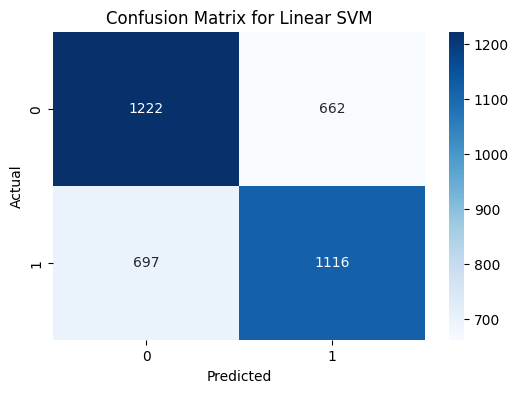

In [61]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the model
model_linear = SVC(kernel='linear', C=1.0)

# Fit the model
model_linear.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = model_linear.predict(X_test)

# Evaluate the model
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f'Linear SVM Accuracy: {accuracy_linear}')

# Confusion Matrix
cm_linear = confusion_matrix(y_test, y_pred_linear)
print(f'Confusion Matrix for Linear SVM:\n{cm_linear}')

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Linear SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


RBF SVM Accuracy: 0.7262645388152557
Confusion Matrix for RBF SVM:
[[1456  428]
 [ 584 1229]]


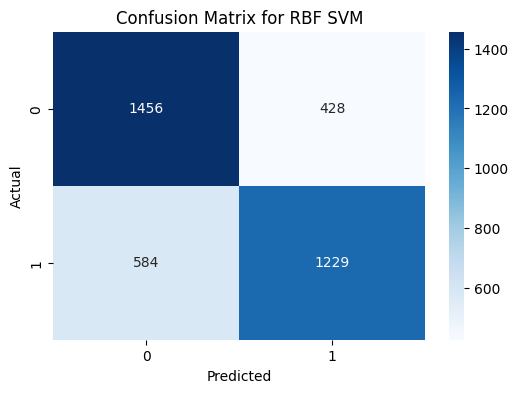

In [62]:
# Define the model
model_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')

# Fit the model
model_rbf.fit(X_train, y_train)

# Predict on the test set
y_pred_rbf = model_rbf.predict(X_test)

# Evaluate the model
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f'RBF SVM Accuracy: {accuracy_rbf}')

# Confusion Matrix
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
print(f'Confusion Matrix for RBF SVM:\n{cm_rbf}')

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for RBF SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Polynomial SVM Accuracy: 0.7000270489586151
Confusion Matrix for Polynomial SVM:
[[1359  525]
 [ 584 1229]]


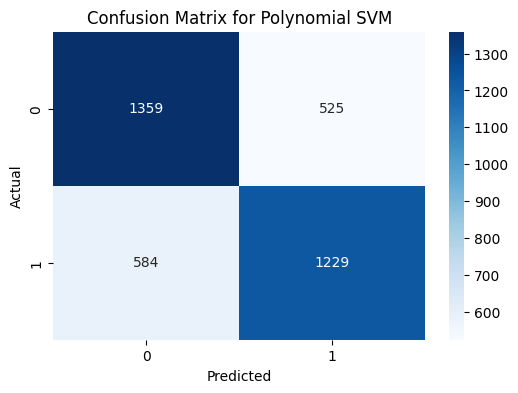

In [63]:
# Define the model
model_poly = SVC(kernel='poly', degree=3, C=1.0, gamma='scale')

# Fit the model
model_poly.fit(X_train, y_train)

# Predict on the test set
y_pred_poly = model_poly.predict(X_test)

# Evaluate the model
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f'Polynomial SVM Accuracy: {accuracy_poly}')

# Confusion Matrix
cm_poly = confusion_matrix(y_test, y_pred_poly)
print(f'Confusion Matrix for Polynomial SVM:\n{cm_poly}')

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_poly, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Polynomial SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# **7.Comparison of Algorithm Accuracy**

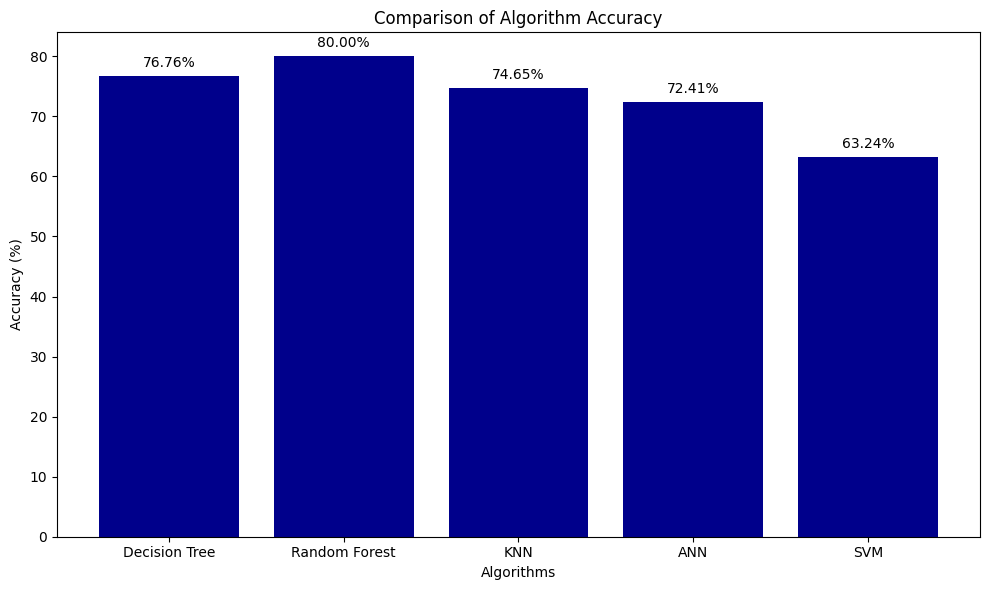

In [68]:
algorithm_names = ['Decision Tree', 'Random Forest', 'KNN', 'ANN', 'SVM']
accuracy_scores = [0.7676 , 0.8000, 0.7465, 0.7241,0.6324]

# Convert accuracy scores to percentages
accuracy_percentages = [score * 100 for score in accuracy_scores]

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create a bar chart: algorithm_names on the X-axis, accuracy_percentages on the Y-axis
plt.bar(algorithm_names, accuracy_percentages, color='darkblue')

# Add labels and title
plt.xlabel('Algorithms')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Algorithm Accuracy')

# Display the actual accuracy percentage above each bar
for i, score in enumerate(accuracy_percentages):
    plt.text(i, score + 1, f'{score:.2f}%', ha = 'center', va = 'bottom')

# Display the plot
plt.tight_layout()
plt.show()


**5. Discuss about your results:**
#I.Why the accuracy of your model is different as you change the hyper parameter values or the classifier.  
#II.Why a classifier shows better accuracy than the others for a certain parameter setting or with a different transformation method.
# III.Any interesting observations

# Model Differences Due to Hyperparameter Changes or Classifiers

**Random Forest:** Adjusting parameters like n_estimators (number of trees) and max_depth (maximum tree depth) helps balance overfitting and underfitting. Higher values for these parameters generally improve accuracy but can increase the risk of overfitting.

**Decision Tree:** The accuracy is influenced by changes in max_depth and min_samples_split. A shallower tree or a higher min_samples_split can reduce overfitting but might lead to underfitting if set too high.

**KNN:** The n_neighbors parameter affects accuracy. Increasing the number of neighbors makes predictions smoother but can lose detail, potentially lowering accuracy.

**SVM:** Different kernel functions (e.g., linear, polynomial, RBF) impact performance based on the data characteristics. The RBF kernel generally fits non-linear data better, but tuning C and gamma is crucial for balancing accuracy and regularization.

# Best Performing Parameter Settings

**Random Forest:** A combination of a high number of n_estimators and a moderate max_depth typically yields the best results, as the ensemble approach reduces variance.

**Decision Tree:** Lower max_depth settings combined with an optimal min_samples_split help balance overfitting and underfitting, improving generalization.

**SVM with RBF Kernel:** Adjusting the C (penalty parameter) and gamma significantly impacts accuracy. Higher C values tend to improve accuracy but can lead to overfitting if set too high.

# Interesting Observations

Ensemble Methods: Random Forest tends to perform best for complex data patterns because it reduces overfitting compared to a single Decision Tree.

Kernel Choice in SVM: The non-linear RBF kernel often outperforms linear kernels due to its better flexibility in fitting complex data patterns.

**ANN: **The learning rate has a significant impact on model performance. While a learning rate of 0.001 showed steady improvement, a learning rate of 0.01 yielded the best results, highlighting the importance of tuning this hyperparameter. Additionally, the model with two hidden layers showed a more pronounced improvement in accuracy and a consistent decrease in loss, indicating effective learning and better generalization.

**SVM and ANN Observations: **The SVM with an RBF kernel and well-tuned C and gamma parameters generally performed better due to its ability to handle non-linear relationships in the data. For ANN, the model with two hidden layers and a learning rate of 0.01 achieved the highest accuracy, demonstrating the importance of both network topology and learning rate in achieving optimal performance.

Overall, the best accuracy achieved in these experiments was 0.7235 with a learning rate of 0.01 and a model with two hidden layers. These findings underscore the importance of carefully selecting and tuning hyperparameters such as the number of hidden layers and the learning rate to optimize model performance.

# **8.Conclusion**

In Lab 3, we explored various data mining techniques, employing decision trees, KNN, and neural networks to predict bike buyers. Through iterative model tuning and validation, we gained insights into the trade-offs of complexity and accuracy, learning the importance of choosing the right parameters and algorithms for optimal predictive performance.

According to the graphical comparision of the algorithms, random forest has the highest accuracy with 80%.